***
# DEFAULT PAYMENT OF CREDIT CARD CLIENTS
***

## Predicting whether a client will default in their payments
***

Dataset obtained from [Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset).
It shows Default Payments of Credit Card Clients in Taiwan from 2005
The original dataset can be found at the UCI Machine Learning Repository.

***
### There are 25 features to consider:
As mentioned in the website
***
1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
20. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
21. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
22. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
23. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
24. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
25. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* target variable: default.payment.next.month: Default payment (1=yes, 0=no)
***

In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading csv file to get the data
data = pd.read_csv('/Users/sriramsureshkumar/Desktop/CSV files/UCI_Credit_Card.csv')

In [3]:
# Looking at a sample of data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

***
## Exploratory Data Analysis
***

In [7]:
sns.set_style('whitegrid')

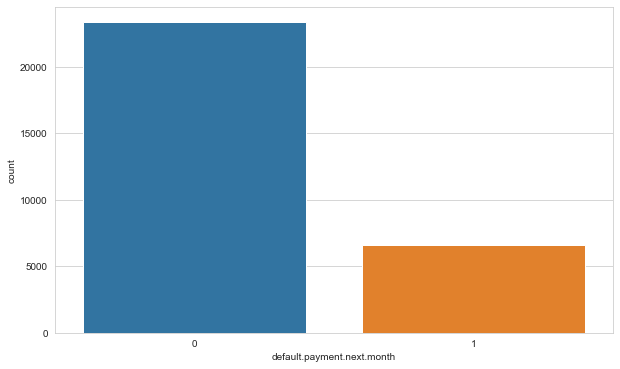

In [8]:
# Looking at the count of no. of people who defaulted
plt.figure(figsize=(10,6))
sns.countplot('default.payment.next.month', data=data)

In [9]:
# Checking the percentage of people who defaulted
x = data[data['default.payment.next.month'] == 1]['ID'].count()
y = data[data['default.payment.next.month'] == 0]['ID'].count()
print(round((x/y)*100,3),'%')

28.403 %


***
### Let's make count plots of all categorical features

Text(0.5, 0, 'EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)')

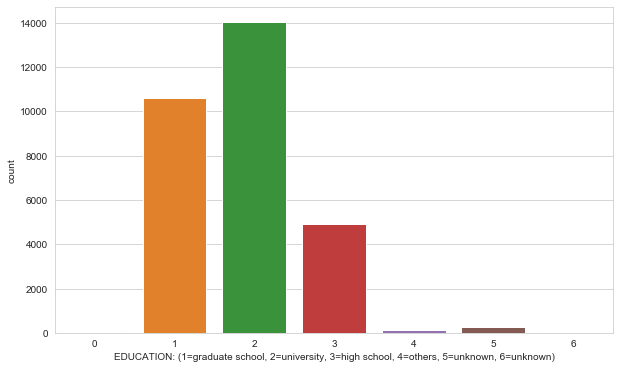

In [10]:
plt.figure(figsize=(10,6))
sns.countplot('EDUCATION', data=data)
plt.xlabel('EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)')

### Looks like there are labels which are 0, but it's not mentioned exactly what they are.
***

Text(0.5, 0, 'MARRIAGE: Marital status (1=married, 2=single, 3=others)')

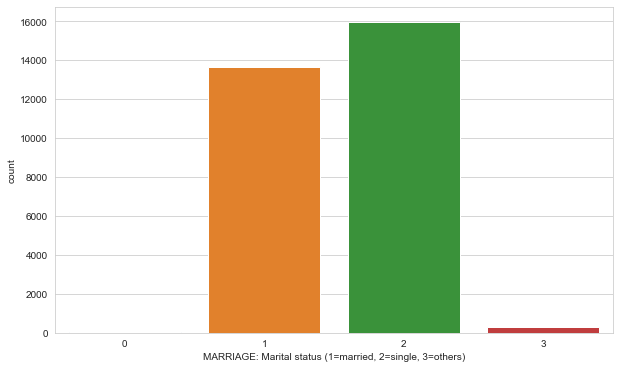

In [11]:
plt.figure(figsize=(10,6))
sns.countplot('MARRIAGE', data=data)
plt.xlabel('MARRIAGE: Marital status (1=married, 2=single, 3=others)')

### Again there are labels which are 0. They could be undocumented and hence given the 0 value
***

Text(0.5, 0, 'SEX (1=male, 2=female)')

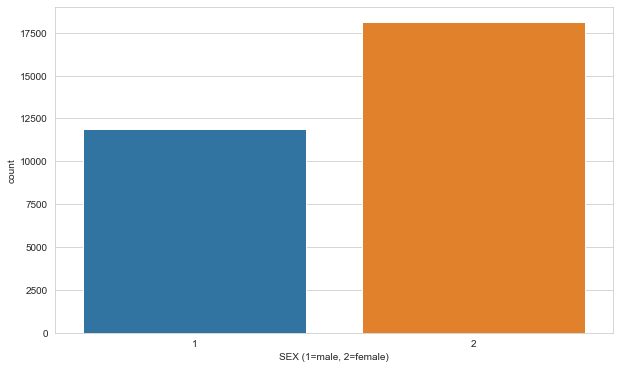

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='SEX', data=data)
plt.xlabel('SEX (1=male, 2=female)')

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

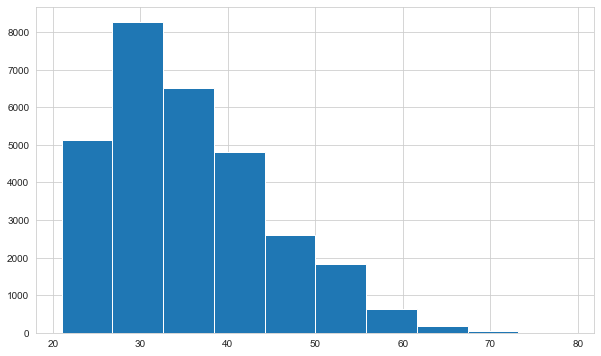

In [13]:
# Looking at age distributions in the credit card dataset
plt.figure(figsize=(10,6))
plt.hist(data['AGE'])

In [14]:
# Checking correlation of features with target variable
data.corr()['default.payment.next.month'].sort_values(ascending=False)

default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default.payment.nex

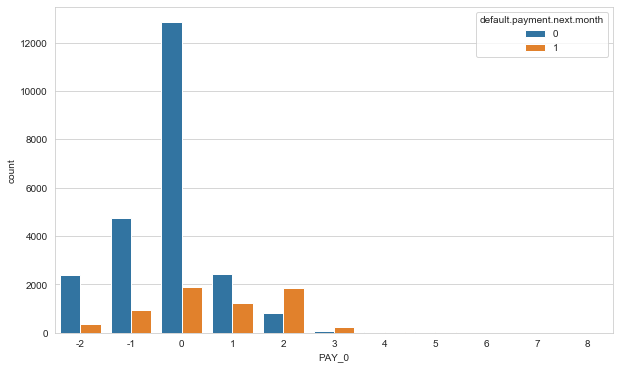

In [15]:
# Checking to see if people defaulted or not for various PAY_0 categories
plt.figure(figsize=(10,6))
sns.countplot(x='PAY_0', hue='default.payment.next.month', data=data)

### Looks like people default more if they have a payment delay of more than 2 months

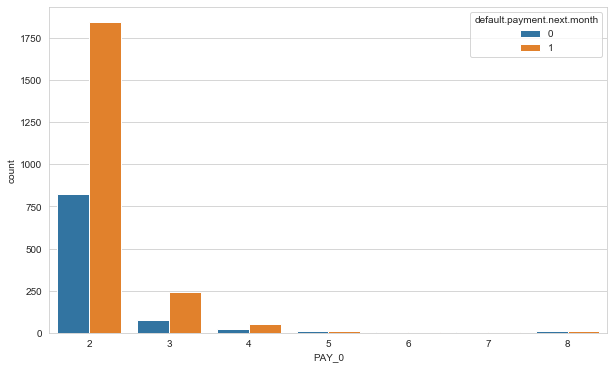

In [16]:
# Exploring the above case
case_1 = data[data['PAY_0'] >= 2]['PAY_0']
plt.figure(figsize=(10,6))
sns.countplot(x=case_1, hue='default.payment.next.month', data=data)

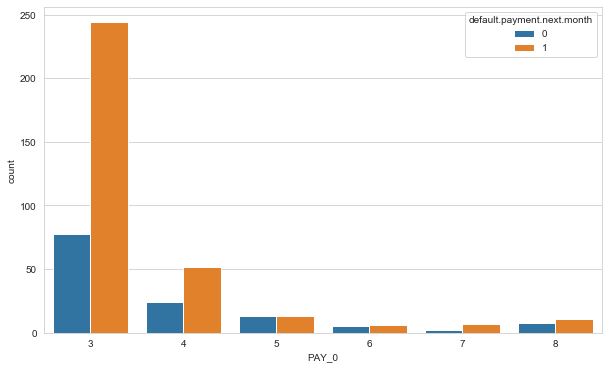

In [17]:
# For 3 months and more of he above case
case_2 = data[data['PAY_0'] >= 3]['PAY_0']
plt.figure(figsize=(10,6))
sns.countplot(x=case_2, hue='default.payment.next.month', data=data)

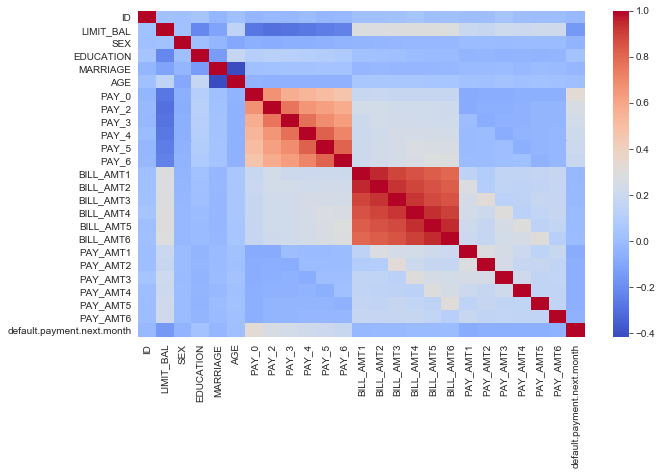

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='coolwarm')

***
### As there were no missing values, there isn't a lot of data cleaning to do.

***
## Creation of the Machine learning model

### I'll use LogisticRegression, DecisionTreeClassifier, RandomForestClassifier. I'll also use a Artificial neural network. Let's see which model predicts best.
***

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [23]:
logistic_model = LogisticRegression() 

In [24]:
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred_logistic = logistic_model.predict(X_test)

In [26]:
print(classification_report(y_test, pred_logistic))
print('\n')
print(confusion_matrix(y_test, pred_logistic))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7007
           1       0.69      0.25      0.36      1993

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.63      9000
weighted avg       0.79      0.81      0.77      9000



[[6789  218]
 [1500  493]]


### Random Forest Classifier

In [27]:
random_forest_model = RandomForestClassifier(n_estimators=300)

In [28]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
pred_random_forest = random_forest_model.predict(X_test)

In [30]:
print(classification_report(y_test, pred_random_forest))
print('\n')
print(confusion_matrix(y_test, pred_random_forest))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7007
           1       0.66      0.36      0.46      1993

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



[[6645  362]
 [1284  709]]


### Decision Tree Classifier

In [31]:
tree_model = DecisionTreeClassifier()

In [32]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
pred_tree = tree_model.predict(X_test)

In [34]:
print(classification_report(y_test, pred_tree))
print('\n')
print(confusion_matrix(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7007
           1       0.39      0.41      0.40      1993

    accuracy                           0.73      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.73      0.73      9000



[[5718 1289]
 [1181  812]]


***
### ANN

In [35]:
ann_model = Sequential()

In [36]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=35)

In [37]:
#input layer
ann_model.add(Dense(24, activation='relu'))
ann_model.add(Dropout(0.2))

#hidden layer
ann_model.add(Dense(12, activation='relu'))
ann_model.add(Dropout(0.2))

#hidden layer
ann_model.add(Dense(6, activation='relu'))
ann_model.add(Dropout(0.2))

#output layer
ann_model.add(Dense(1, activation='sigmoid'))

#compile model
ann_model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
ann_model.fit(X_train,y_train,
              epochs=300,
              batch_size=128,
              validation_data=(X_test,y_test),
              callbacks=[early_stop])

Epoch 1/300
165/165 [==============================] - 0s 3ms/step - loss: 0.5563 - val_loss: 0.4892
Epoch 2/300
165/165 [==============================] - 0s 2ms/step - loss: 0.5103 - val_loss: 0.4726
Epoch 3/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4960 - val_loss: 0.4650
Epoch 4/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4844 - val_loss: 0.4569
Epoch 5/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4767 - val_loss: 0.4534
Epoch 6/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4741 - val_loss: 0.4498
Epoch 7/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4678 - val_loss: 0.4464
Epoch 8/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4632 - val_loss: 0.4451
Epoch 9/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4617 - val_loss: 0.4434
Epoch 10/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4584 - val_lo

165/165 [==============================] - 0s 2ms/step - loss: 0.4350 - val_loss: 0.4324
Epoch 82/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4348 - val_loss: 0.4330
Epoch 83/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4339 - val_loss: 0.4322
Epoch 84/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4322 - val_loss: 0.4322
Epoch 85/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4346 - val_loss: 0.4328
Epoch 86/300
165/165 [==============================] - 0s 3ms/step - loss: 0.4338 - val_loss: 0.4338
Epoch 87/300
165/165 [==============================] - 0s 3ms/step - loss: 0.4338 - val_loss: 0.4336
Epoch 88/300
165/165 [==============================] - 0s 3ms/step - loss: 0.4314 - val_loss: 0.4321
Epoch 89/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4316 - val_loss: 0.4319
Epoch 90/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4344 - val_loss: 

Epoch 161/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4319 - val_loss: 0.4324
Epoch 162/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4303 - val_loss: 0.4313
Epoch 163/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4305 - val_loss: 0.4318
Epoch 164/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4301 - val_loss: 0.4322
Epoch 165/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4290 - val_loss: 0.4330
Epoch 166/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4321 - val_loss: 0.4329
Epoch 167/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4292 - val_loss: 0.4327
Epoch 168/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4303 - val_loss: 0.4326
Epoch 169/300
165/165 [==============================] - 0s 2ms/step - loss: 0.4286 - val_loss: 0.4328
Epoch 170/300
165/165 [==============================] - 0s 2ms/step - lo

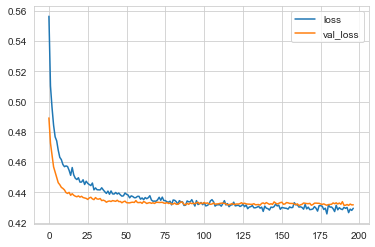

In [39]:
losses = pd.DataFrame(ann_model.history.history)
losses.plot()

In [40]:
pred_ann = ann_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [41]:
print(classification_report(y_test, pred_ann))
print('\n')
print(confusion_matrix(y_test, pred_ann))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7007
           1       0.69      0.32      0.44      1993

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



[[6713  294]
 [1346  647]]


***
## Conclusion: It's not a great result for any of the three models, since dataset was already imbalanced in the ratio of 72 to 28. 
***